In [1]:
# tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [20]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
classes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


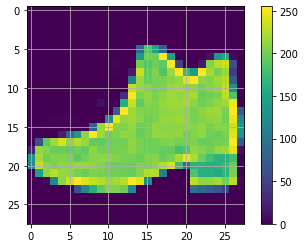

In [25]:
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(True)
plt.show()

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

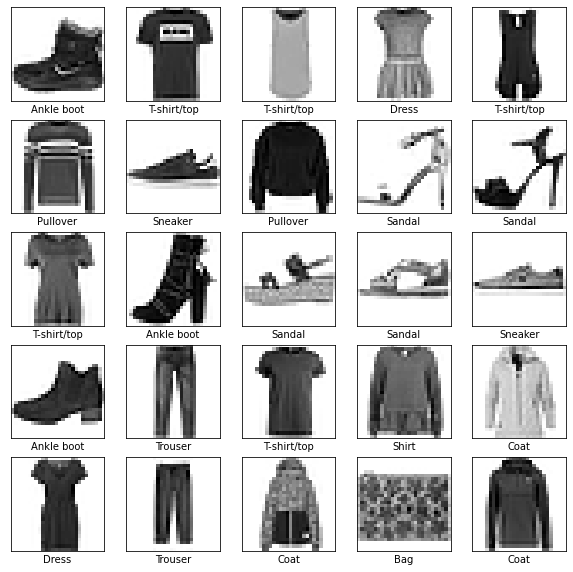

In [27]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(classes_names[train_labels[i]])

plt.show()

In [28]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3352 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3130 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2448 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [31]:
# verify the accuracy and loss of model in test step
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3519 - accuracy: 0.8771


In [32]:
predictions = model.predict(test_images)

In [34]:
predictions[0]

array([5.3376304e-08, 3.8302014e-10, 1.9772160e-07, 2.1062865e-08,
       4.7304027e-08, 1.7296531e-03, 1.0130685e-05, 1.2600046e-01,
       4.4671702e-07, 8.7225896e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".
             format(
                 classes_names[predicted_label],
                 100*np.max(predictions_array),
                 classes_names[true_label]),
                 color=color
                 )

In [52]:
def plot_values_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

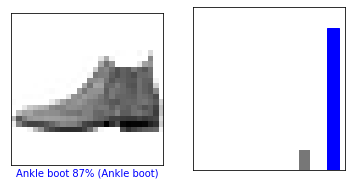

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_values_array(i, predictions, test_labels)
plt.show()

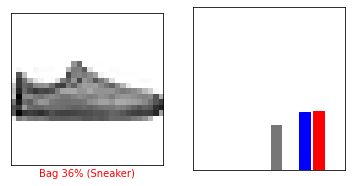

In [54]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_values_array(i, predictions, test_labels)
plt.show()

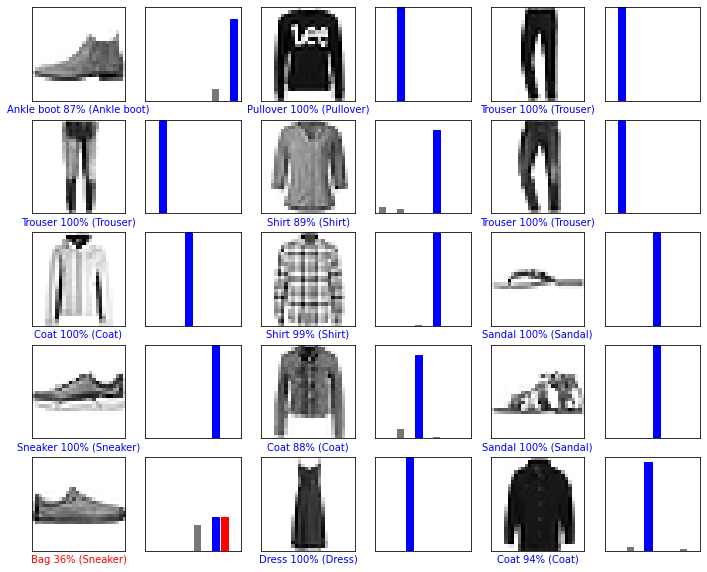

In [60]:
num_rows = 5
num_cols = 3

num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_values_array(i, predictions, test_labels)

plt.show()

In [64]:
img = test_images[0]
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [65]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.3376301e-08 3.8301939e-10 1.9772253e-07 2.1062945e-08 4.7304027e-08
  1.7296562e-03 1.0130694e-05 1.2600057e-01 4.4671742e-07 8.7225890e-01]]


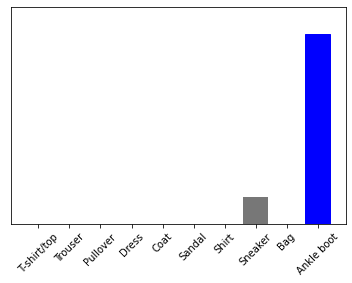

In [66]:
plot_values_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), classes_names, rotation=45)

In [67]:
np.argmax(predictions_single[0])

9